# Biodiversity

Project's goal is to analyze biodiversity data from National Parks Service, particularly around various species observed in different national parks locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project aims to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `observations.csv` and `species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com)

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

Four sections were created to help guide the project's process and progress. The first sections is the project goals, this sections will define the high-level objectives and set the intentions for this project.

The next section is the data, which needs to be checked if project goals can be met with the available data. 

Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the projects goals.

Lastly, evaluation will help us build conclusions and findings from our analysis.

### 1. Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks.

Therefore, the main objective as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks.

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### 2. Data

This project has two data sets that came with the package. `species_info.csv` file has information about each species and the other has observations of species with park locations. This data will be used to analyze the goals of the project.

### 3. Analysis

In this sections, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

1. Distributions
1. Counts
1. Relationship between species
1. Conservation status of species
1. Observation of species in parks

### 4. Evaluation

Lastly, it is a good idea to revisit the goals and check if the output of analysis corresponds to the questions first set to be answered (in project goals section). This sections will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations of if any of the analysis could have been done using different methodologies.

## Import Python Modules

In [29]:
import pandas as pd
import string
from itertools import chain
from scipy.stats import chi2_contingency
import seaborn as sns
from matplotlib import pyplot as plt


## Load the Data

In [30]:
species = pd.read_csv("species_info.csv", encoding='utf-8')
observations = pd.read_csv("observations.csv", encoding='utf-8')

In [31]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [32]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Characteristics

Next, there will be a check for summary and descriptive statistics.

`species_info.csv`

In [33]:
species.describe(include="all")

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [34]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


`observations.csv`

In [35]:
observations.describe(include="all")

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [36]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


## Explore the Data

From `species_info.csv`, we can see there are **7** unique **categories** and **4** unique **conservation_status**

In [37]:
print(f"Categories: {species.category.unique()}")
print(f"Observation status: {species.conservation_status.unique()}")

Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Observation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


From descriptive statistics we can see **Vascular Plant** is by far the largest share of species with 4,470. For **conservation_status** there is huge number of missing values, only **191** from 5824 values.

In [38]:
species.category.value_counts()

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

In [39]:
species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

From `observations.csv` descriptive statistics, there are **4** unique **park_name**.

In [40]:
print(f"Parks: {observations.park_name.unique()}")
observations.park_name.value_counts()

Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64

All parks have the same number of rows. This could mean the existence of repeated inputs.

## Analysis

After exploring the data, first task will be to clean it. The most obvious concern is `conservation_status` column in `species` with only **191** inputs.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`. For this, method **Baseline Observation Carried Forward (BOCF)** will be used.

In [57]:
species.conservation_status.fillna(value="No Intervention", inplace=True)
species["conservation_status"].value_counts()

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

In [42]:
conservationCategory = species[species["conservation_status"] != "No Intervention"]\
  .groupby(["conservation_status", "category"])["scientific_name"]\
  .count()\
  .unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 0, 'Conservation Status')

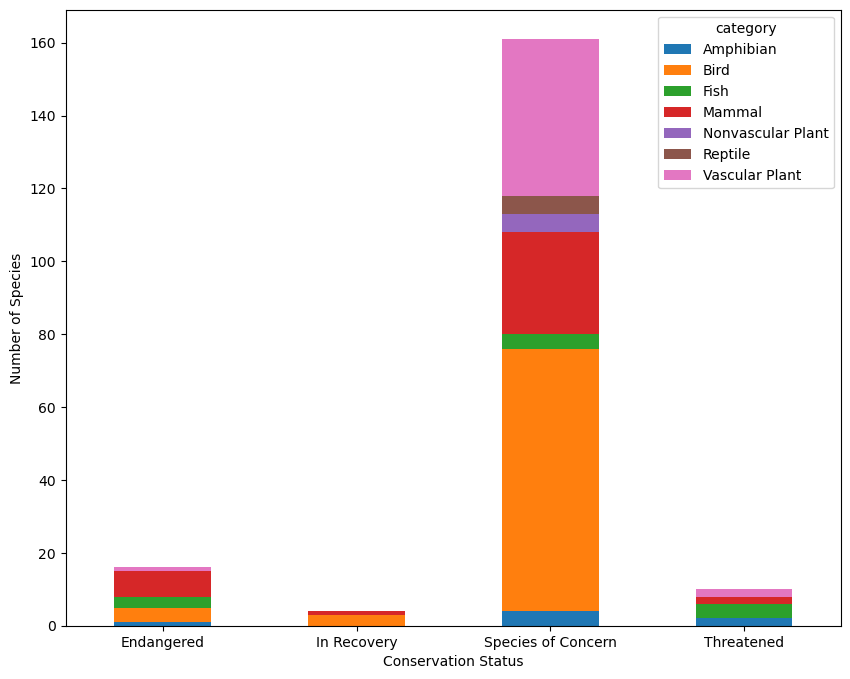

In [43]:
ax = conservationCategory.plot(kind="bar", stacked=True, figsize=(10, 8))
ax.set_xticklabels(ax.get_xticklabels() ,rotation=0)
ax.set_ylabel("Number of Species")
ax.set_xlabel("Conservation Status")

### In conservation

The next question is if certain types of species are more likely to be endangered. This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`

In [44]:
species["is_protected"] = species["conservation_status"] != "No Intervention"

In [45]:
speciesProtected = species.groupby(["category", "is_protected"])\
  .scientific_name.nunique()\
  .reset_index()\
  .pivot(columns="is_protected", index="category", values="scientific_name")\
  .reset_index()
speciesProtected.columns = ['category', 'not_protected', 'protected']
speciesProtected["percent_protected"] = speciesProtected["protected"] * 100 / \
                              (speciesProtected["protected"] + speciesProtected["not_protected"])
speciesProtected

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


It's easy to see that **Birds, Vascular Plants, and Mammals** have a higher absolute number of species protected. 

### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

|       | protected | not protected |
|   -   |     -     |       -       |
|Mammal |     30    |      146      |
|Bird   |     75    |      413      |

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

In [46]:
contingency1 = [[30, 146], [75, 413]]
chi2, pval, dof, expected = chi2_contingency(contingency1)
print(f"chi2: {chi2}")
print(f"pval: {pval}")
print(f"dof: {dof}")
print(f"expected: {expected}")

chi2: 0.1617014831654557
pval: 0.6875948096661336
dof: 1
expected: [[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


Probability value (0.68) is much higher than 0.05. Suggesting that there is not enough evidence to reject the null hypothesis. There is no relation between mammals and birds.

The next pair, is going to test `Reptile` and `Mammal`.

|       | protected | not protected |
|   -   |     -     |       -       |
|Mammal |     30    |      146      |
|Reptile|     5     |      73       |

In [47]:
contingency2 = [[30, 146], [5, 73]]
chi2, pval, dof, expected = chi2_contingency(contingency2)
print(f"chi2: {chi2}")
print(f"pval: {pval}")
print(f"dof: {dof}")
print(f"expected: {expected}")

chi2: 4.289183096203645
pval: 0.03835559022969898
dof: 1
expected: [[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


This time p-value is 0.038 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammals is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared whit Reptiles.

### Species in Parks

The first step is to look at the common names from Mammals to get an idea fo the most prevalent animals in the dataset. The data will be splitted in two individual names.

In [48]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

The next step is to clean up duplicate words in each row since they should no be counted more than once.

In [49]:
common_name_not_repeated = []

for item in common_Names:
  item = list(dict.fromkeys(item))
  common_name_not_repeated.append(item)

common_name_not_repeated[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

Next the words need to be collapsed into one list for easier use.

In [50]:
names_in_list = list(
  chain.from_iterable(
    index if isinstance(index, list) else [index] for index in common_name_not_repeated
  )
)

names_in_list[:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

Now the data is ready to be able to count the numbers of occurrences of each word.

In [51]:
words_counted = []

for i in names_in_list:
  x = names_in_list.count(i)
  words_counted.append((i, x))

pd.DataFrame(set(words_counted), columns=["Word", "Count"])\
  .sort_values("Count", ascending=False)\
  .head(10)

,Word,Count
66,Bat,23
18,Shrew,18
74,Myotis,17
133,Mouse,16
60,Chipmunk,13
13,Squirrel,12
170,American,12
150,Eastern,11
165,Vole,11
171,Western,10


The next task is to figure out which rows of `species` are referring to bats.

In [52]:
species["is_bat"] = species["common_names"].str.contains(r"\bBat\b", regex=True)
print(f"Number of Bats: {len(species[species["is_bat"]])}")
species[species["is_bat"]]

Number of Bats: 23


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next the results of the bat species will be merged with `observations` to create a DataFrame.

In [53]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations = pd.merge(
  observations,
  species[species["is_bat"]],
  left_on="scientific_name",
  right_on="scientific_name"
)
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


Let's see how many total bat observations were made at each national parks.

In [54]:
bat_observations\
  .groupby("park_name")\
  .observations\
  .sum()\
  .reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let us see each park broken down by protected bats vs non-protected bat.

In [55]:
bat_protected_at_parks = bat_observations\
  .groupby(["park_name", "is_protected"])\
  .observations\
  .sum()\
  .reset_index()\
  .pivot(
    columns="is_protected",
    index="park_name",
    values="observations"
  )\
  .reset_index()

bat_protected_at_parks.columns = ["park_name", "not_protected", "protectred"]
bat_protected_at_parks


,park_name,not_protected,protectred
0,Bryce National Park,1596,1837
1,Great Smoky Mountains National Park,1299,1112
2,Yellowstone National Park,4044,4318
3,Yosemite National Park,2345,2441


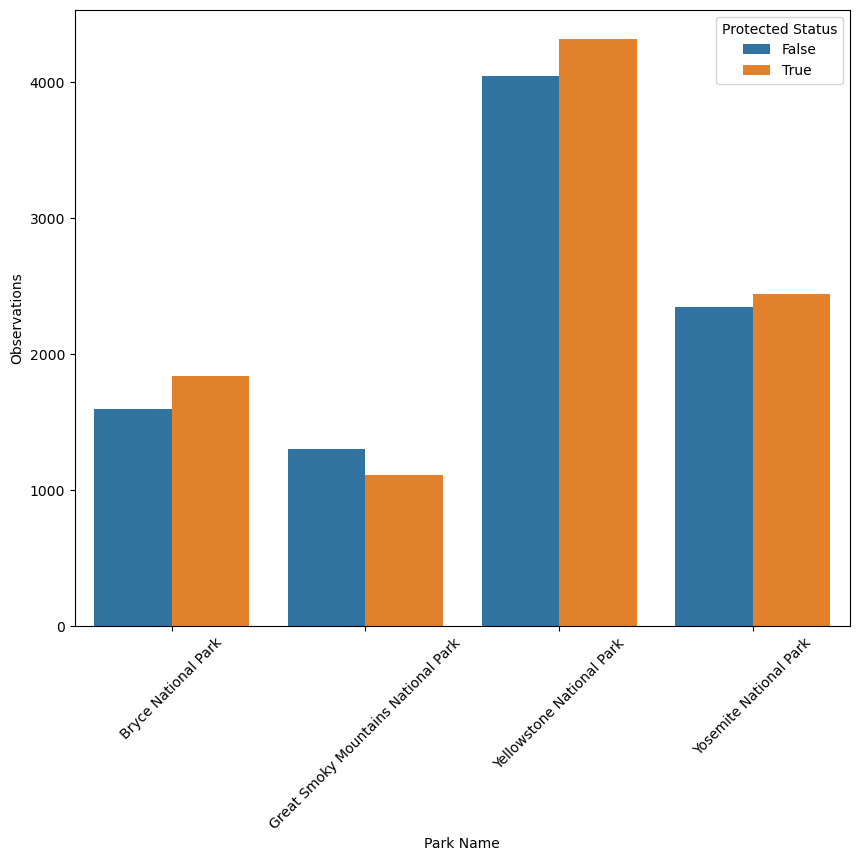

In [56]:
bat_protected_at_parks_graph = bat_observations\
  .groupby(["park_name", "is_protected"])\
  .observations\
  .sum()\
  .reset_index()
bat_protected_at_parks

plt.figure(figsize=(10, 8))
sns.barplot(
  data=bat_protected_at_parks_graph, 
  x=bat_protected_at_parks_graph["park_name"], 
  y=bat_protected_at_parks_graph["observations"],
  hue=bat_protected_at_parks_graph["is_protected"]
)
plt.xticks(rotation=45)
plt.xlabel("Park Name")
plt.ylabel("Observations")
plt.legend(title="Protected Status")

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.


## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 